### Modularity clustering on undirected graphs
This code follows from Mark Newman 2006 (publications) 

We start with some basic imports:

In [2]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt

Next, create a symmetric matrix with two random communities for testing purposes:


In [3]:
def sym_rand_community(n, m, pn = 0.9, pm = 0.9, pnm = 0.1):
    mat = np.zeros((n + m, n + m))
    for i in range(0, n):
        for j in range(0, i):
            mat[i, j] = 1 if np.random.random_sample() < pn else 0
            mat[j, i] = mat[i, j]
    for i in range(n, n + m):
        for j in range(n, i):
            mat[i, j] = 1 if np.random.random_sample() < pm else 0
            mat[j, i] = mat[i, j]
    for i in range(0, n):
        for j in range(n, n + m):
            mat[i, j] = 1 if np.random.random_sample() < pnm else 0
            mat[j, i] = mat[i, j]
    return mat


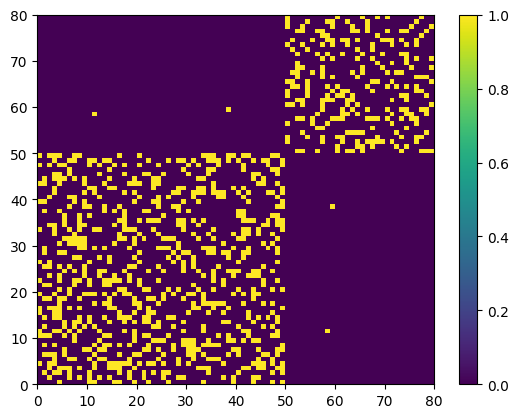

In [8]:
adj = sym_rand_community(50, 30, 0.3, 0.3, 0.001)

plt.pcolormesh(adj)
plt.colorbar()

## Now we try to implement the code in the paper (2006a). 

First calculate the modularity matrix:

In [9]:
def calculate_modularity_mat(adj): 
    # initialize matrix
    n = np.shape(adj)[0]
    mod_mat = np.zeros((n, n))

    # calculate total edges in matrix:
    m2 = np.sum(adj) # actually twice the number of edges!
    deg = np.zeros(n)
    for i in range(n):
        deg[i] = np.sum(adj[i, :])
    
    mod_mat = adj - np.outer(deg, deg) / m2
    
    return mod_mat

In [10]:
test = np.array([1, 2, 3])
res = np.outer(test, test)
res

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [11]:
mod_mat = calculate_modularity_mat(adj)

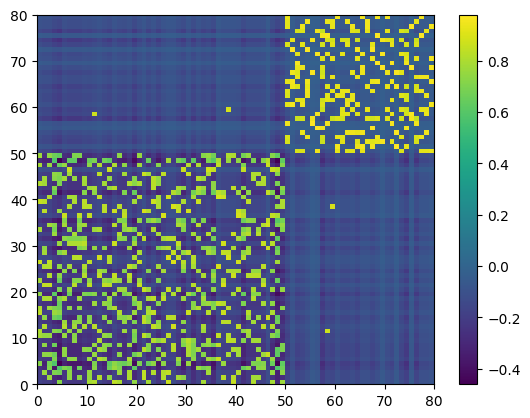

In [12]:
# visualization of modularity matrix
plt.pcolormesh(mod_mat)
plt.colorbar()

Next, calculate the eigenvalues and eigenvectors. Then split into communities based on the signs of the largest eigenvector. 

In [13]:
ews, evs = np.linalg.eig(mod_mat)

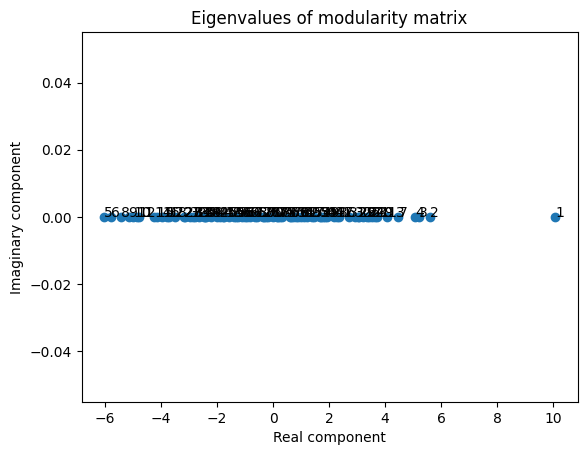

In [14]:
# plot eigenvalues of modularity matrix
fig, ax = plt.subplots()
ax.scatter(ews.real, ews.imag)
ax.set_title("Eigenvalues of modularity matrix")
ax.set_xlabel("Real component")
ax.set_ylabel("Imaginary component")

# optional: label each eigenvalue (sorted from largest magnitude to smallest)
n = np.size(ews)
for i in range(n):
    ax.annotate(i + 1, (ews[i].real, ews[i].imag))

Next, we get the indices of the two communities and then visualize them. 

In [15]:
# get indices
s = np.zeros(n)
for i in range(n):
    s[i] = 1 if evs[i, 0] > 0 else -1 
idx1 = s == 1
idx2 = s == -1

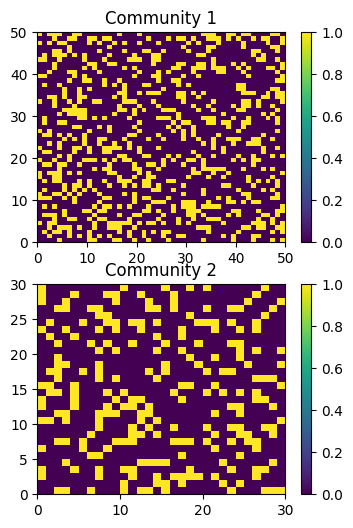

In [35]:
# note here index can be for any group
fig, axs = plt.subplots(2, figsize = (4, 6))

ax0 = axs[0].pcolormesh(adj[idx1, :][:, idx1])
axs[0].set_title("Community 1")

ax1 = axs[1].pcolormesh(adj[idx2, :][:, idx2])
axs[1].set_title("Community 2")

fig.colorbar(ax0)
fig.colorbar(ax1)

Finally, calulate the modularity:

In [41]:
Q = 1/(2*(np.sum(adj))) * np.dot(s, np.dot(mod_mat, s))
Q

np.float64(0.367144494663116)

So we should be able to write a complete function to split a graph into two commmunities using modularity:

In [48]:
def modularity_split(adj):
    # calculates a graph partitioning using modularity on a symmectric graph

    # calulate modularity matrix
    n = np.shape(adj)[0]

    B = np.zeros((n, n))

    # calculate total edges in matrix:
    m2 = np.sum(adj) # actually twice the number of edges!
    deg = np.zeros(n)
    for i in range(n):
        deg[i] = np.sum(adj[i, :])
    
    B = adj - np.outer(deg, deg) / m2

    # get eigenvectors
    ews, evs = np.linalg.eig(B)
    
    # get signs
    s = np.sign(evs[:, 0])

    # calculate modularity
    Q = np.dot(s, np.dot(B, s)) / (2 * m2)
    return s, Q